<a href="https://colab.research.google.com/github/woodRock/fishy-business/blob/main/code/identification/species/RO1_SO1_Identification_Species_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Objective 1 - Identification, Subobjetive 1 - Fish species

To identify a fish species, either Hoki or Mackeral, is a binary classification task.

## Convolutional Neural Network (CNN)

Convolutional Neural Network (CNN) is used to perform binary classification for the fish species identification task.


Mount the google drive where the closed-source dataset is safely and privately stored.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir('/content/drive/My Drive')

Mounted at /content/drive


['Colab Notebooks',
 'University',
 'AI',
 'profile.jpg',
 'personal',
 'ass3_example_solutions_marking_guides_2023_V2.docx',
 'JAPA101: Handwriting Assignment - Part 2 - Creative Writing and Reflection.gdoc']

## Load the data

To load an xlsx file into memory using Python, you can use the pandas library. The pandas library provides a read_excel() function that can be used to read an xlsx file into a DataFrame object.

This code will join the strings in the path_array variable and print the resulting joined path. The output will be /usr/local/bin.

Note that the * operator is used to unpack the path_array variable so that each element in the array is passed as a separate argument to the os.path.join() function. This allows the function to join the strings in the array together to form a valid path.

To convert the feature names (column names) of a Pandas DataFrame to strings, you can use the DataFrame.columns.astype(str) method. This will convert the column names to strings and return a new index object.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

path = ['drive', 'MyDrive', 'AI', 'fish', 'REIMS_data.xlsx']
path = os.path.join(*path)

# Load the dataset
data = pd.read_excel(path)

# Statistical Methods


# Classification - Traditional Machine Learning Techniques

# CNN

## Hyperparameters

In [3]:
# Hyperparameters
learning_rate = 1E-4 #@param {type:"integer"}
batch_size = 64 # @param {type:"integer"}
epochs = 2000 # @param {type:"integer"}

# Pre-processing

In [4]:
import torch
import numpy as np
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset

class CustomDataset(Dataset):

    def __init__(self, samples, labels):
        self.samples = torch.tensor(samples.to_numpy(), dtype=torch.float32)
        self.labels = torch.tensor([np.array(ys) for ys in labels], dtype=torch.float32)

        # Normalize the features to be between in [0,1]
        self.samples = F.normalize(self.samples, dim = 0)

        # full_batch_size = self.samples.shape[0]  # Get the batch size
        # in_channels = 1  # The number of channels in each item
        # sequence_length = self.samples[0].shape[0]  # Get the sequence length
        # # Reshape the input data
        # self.samples = self.samples.view(full_batch_size, in_channels, sequence_length)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx], self.labels[idx]


print("[INFO] Reading the dataset.")
raw = pd.read_excel(path)

data = raw[~raw['m/z'].str.contains('HM')]
data = data[~data['m/z'].str.contains('QC')]
data = data[~data['m/z'].str.contains('HM')]
X = data.drop('m/z', axis=1) # X contains only the features.
# Onehot encoding for the class labels, e.g. [0,1] for Hoki, [1,0] for Mackeral.
y = data['m/z'].apply(lambda x: [0,1] if 'H' in x else [1,0])
y = np.array(y)

# Evaluation parameters.
train_split = 0.8
val_split = 0.5 # 1/2 of 20%, validation and test, 10% and 10%, respectively.
# print(f"[DEBUG] train_split, val_split, test_split: ({train_split},{val_split},{test_split})")

# Step 2: Split your dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, stratify=y, test_size=(1-train_split))#, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_split)#, random_state=42)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1-train_split), random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_split, random_state=42)

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
test_dataset = CustomDataset(X_test, y_test)

assert train_dataset.samples.shape[0] == train_dataset.labels.shape[0] , "train_dataset samples and labels should have same length."
assert val_dataset.samples.shape[0] == val_dataset.labels.shape[0] , "train_dataset samples and labels should have same length."
assert test_dataset.samples.shape[0] == test_dataset.labels.shape[0] , "train_dataset samples and labels should have same length."

# Step 4: Create PyTorch DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# calculate steps per epoch for training and validation set
train_steps = len(train_loader.dataset) // batch_size
val_steps = len(val_loader.dataset) // batch_size
# when batch_size greater than dataset size, avoid division by zero.
train_steps = max(1, train_steps)
val_steps = max(1, val_steps)

[INFO] Reading the dataset.


<ipython-input-4-f7cdbc4509a5>:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  self.labels = torch.tensor([np.array(ys) for ys in labels], dtype=torch.float32)


# Resnet

[INFO] Initialize cuda environment
[INFO] Initializing the ResNet model
torch.Size([1, 2])
[INFO] Training the network
[INFO] EPOCH: 1/2000
Train loss: 1.283400, Train accuracy: 0.4545
Val loss: 0.705423, Val accuracy: 0.4348

[INFO] EPOCH: 51/2000
Train loss: 1.001396, Train accuracy: 0.5882
Val loss: 1.085455, Val accuracy: 0.4348

[INFO] EPOCH: 101/2000
Train loss: 0.873507, Train accuracy: 0.6845
Val loss: 6.253303, Val accuracy: 0.4348

[INFO] EPOCH: 151/2000
Train loss: 0.396799, Train accuracy: 0.8770
Val loss: 24.809181, Val accuracy: 0.4348

[INFO] EPOCH: 201/2000
Train loss: 0.312389, Train accuracy: 0.8930
Val loss: 32.971207, Val accuracy: 0.4348

[INFO] EPOCH: 251/2000
Train loss: 0.174101, Train accuracy: 0.9412
Val loss: 32.590576, Val accuracy: 0.4348

[INFO] EPOCH: 301/2000
Train loss: 0.188510, Train accuracy: 0.9091
Val loss: 32.133026, Val accuracy: 0.4348

[INFO] EPOCH: 351/2000
Train loss: 0.102365, Train accuracy: 0.9679
Val loss: 30.364758, Val accuracy: 0.4348


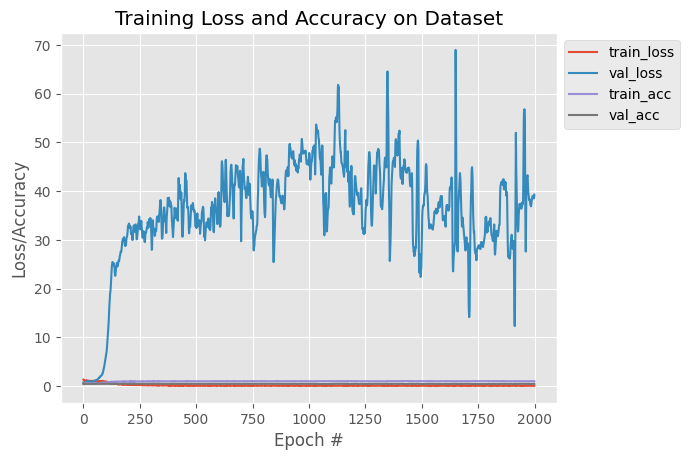

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict
import torch.nn.functional as F
from torch.nn.init import xavier_uniform_
from torch.nn import Sequential, Module, Conv1d, Linear, MaxPool1d, Dropout, Flatten, GELU, Sigmoid, LogSoftmax, CrossEntropyLoss, BatchNorm1d
from torch import flatten
from torch.optim import Adam, AdamW
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import time

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.downsample = downsample
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)
        out = self.dropout(out)

        return out

class ResNet1D(nn.Module):
    """
    References:
        1. He, K., Zhang, X., Ren, S., & Sun, J. (2016).
            Deep residual learning for image recognition.
            In Proceedings of the IEEE conference on computer vision
            and pattern recognition (pp. 770-778).
        1. LeCun, Y. (1989). Generalization and network design strategies.
            Connectionism in perspective, 19(143-155), 18.
        2. LeCun, Y., Boser, B., Denker, J., Henderson, D., Howard,
            R., Hubbard, W., & Jackel, L. (1989).
            Handwritten digit recognition with a back-propagation network.
            Advances in neural information processing systems, 2.
        3. LeCun, Y., Boser, B., Denker, J. S., Henderson, D., Howard, R. E.,
            Hubbard, W., & Jackel, L. D. (1989).
            Backpropagation applied to handwritten zip code recognition.
            Neural computation, 1(4), 541-551.
        4. Hendrycks, D., & Gimpel, K. (2016).
            Gaussian error linear units (gelus).
            arXiv preprint arXiv:1606.08415.
        5. Ioffe, S., & Szegedy, C. (2015, June).
            Batch normalization: Accelerating deep network training by reducing internal covariate shift.
            In International conference on machine learning (pp. 448-456). pmlr.
        6. Srivastava, N., Hinton, G., Krizhevsky, A.,
            Sutskever, I., & Salakhutdinov, R. (2014).
            Dropout: a simple way to prevent neural networks from overfitting.
            The journal of machine learning research, 15(1), 1929-1958.
        7. Hinton, G. E., Srivastava, N., Krizhevsky, A., Sutskever,
            I., & Salakhutdinov, R. R. (2012).
            Improving neural networks by preventing co-adaptation of feature detectors.
            arXiv preprint arXiv:1207.0580.
        8. Glorot, X., & Bengio, Y. (2010, March).
            Understanding the difficulty of training deep feedforward neural networks.
            In Proceedings of the thirteenth international conference on artificial intelligence and statistics (pp. 249-256).
            JMLR Workshop and Conference Proceedings.
        9. Loshchilov, I., & Hutter, F. (2017).
            Decoupled weight decay regularization.
            arXiv preprint arXiv:1711.05101.
    """
    def __init__(self, block, layers, num_classes=2, in_channels=1):
        super(ResNet1D, self).__init__() # ResNet [1]
        self.in_channels = 64
        self.conv1 = nn.Conv1d(in_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(p=0.2)

        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm1d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv1d(self.in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(out_channels),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(block(out_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        x = self.dropout(x)

        return x


def ResNet10_1D(num_classes=2, in_channels=1):
    """ ResNet10 [1]"""
    return ResNet1D(BasicBlock, [1,1,1,1], num_classes=num_classes, in_channels=in_channels)


def ResNet18_1D(num_classes=2, in_channels=1):
    """ ResNet18 [1]"""
    return ResNet1D(BasicBlock, [2,2,2,2], num_classes=num_classes, in_channels=in_channels)


def ResNet50_1D(num_classes=2, in_channels=1):
    """ ResNet50 [1]"""
    return ResNet1D(BasicBlock, [3, 4, 6, 3], num_classes=num_classes, in_channels=in_channels)

print("[INFO] Initialize cuda environment")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Use GPUs if available.

print("[INFO] Initializing the ResNet model")
# Example usage:
# model = ResNet10_1D(num_classes=2, in_channels=1)  # Create ResNet18 for 1D signals with 10 output classes
# model = ResNet18_1D(num_classes=2, in_channels=1)  # Create ResNet18 for 1D signals with 10 output classes
model = ResNet50_1D(num_classes=2, in_channels=1)  # Create ResNet18 for 1D signals with 10 output classes

x = torch.randn(1, 1, 1023)  # Example input with batch size 1, 1 channel, and 128 length
output = model(x)
print(output.shape)  # Output shape will be (1, 6) for 6 classes

# Xavier initialization [8]
def init_weights(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv1d):
        xavier_uniform_(m.weight)

model.apply(init_weights)

if torch.cuda.is_available():
    model.to("cuda")

# AdamW [9]
optimizer = AdamW(model.parameters(), lr=learning_rate)
loss_function = CrossEntropyLoss()

H = {
    "train_loss": [],
    "train_acc": [],
    "val_loss": [],
    "val_acc": []
}

print("[INFO] Training the network")
startTime = time.time()

# Training the CNN model.
for e in range(0, epochs):
    # Puts the model in train mode.
    model.train()

    total_train_loss = 0
    total_val_loss = 0

    train_correct = 0
    val_correct = 0

    # Training routine
    # Note: the benefit of using torch's DataLoader,
    # is that is automatically yields batches of training data.
    # This makes it ammeneable to training a deep neural network.
    for (x,y) in train_loader:
        (x,y) = (x.to(device), y.to(device))
        prediction = model(x.unsqueeze(1))
        # print(f"[DEBUG] prediction: {prediction}")
        # print(f"[DEBUG] y: {y}")
        loss = loss_function(prediction, y)
        optimizer.zero_grad()  # 1. Zero out the gradients
        loss.backward() # 2. Perform a backwards pass.
        optimizer.step() # 3. Update the weights.
        total_train_loss += loss
        train_correct += (prediction.argmax(1) == y.argmax(1)).type(torch.float).sum().item()

    # Evalulation routine
    # no_grad() turns off gradient tracking and computation.
    with torch.no_grad():
        # Puts the model in evaluation mode.
        model.eval()
        for (x,y) in val_loader:
            (x,y) = (x.to(device), y.to(device))
            prediction = model(x.unsqueeze(1))
            total_val_loss = loss_function(prediction,y)
            val_correct += (prediction.argmax(1) == y.argmax(1)).type(torch.float).sum().item()

    # calculate the average training and validation loss
    avgTrainLoss = total_train_loss / train_steps
    avgValLoss = total_val_loss / val_steps

    # calculate the training and validation accuracy
    trainCorrect = train_correct / len(train_loader.dataset)
    valCorrect = val_correct / len(val_loader.dataset)

    # update our training history
    H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
    H["train_acc"].append(trainCorrect)
    H["val_loss"].append(avgValLoss.cpu().detach().numpy())
    H["val_acc"].append(valCorrect)

    # Print telemetry every 50 epochs, to avoid spamming standard out.
    if e % 50 == 0:
        # print the model training and validation information
        print("[INFO] EPOCH: {}/{}".format(e + 1, epochs))
        print("Train loss: {:.6f}, Train accuracy: {:.4f}".format(avgTrainLoss, trainCorrect))
        print("Val loss: {:.6f}, Val accuracy: {:.4f}\n".format(avgValLoss, valCorrect))

    # Early stopping
    # if valCorrect >= 1.00 and trainCorrect >= 1.00:
    #     print("[INFO] Finished on => EPOCH: {}/{}".format(e + 1, epochs))
    #     print("Train loss: {:.6f}, Train accuracy: {:.4f}".format(avgTrainLoss, trainCorrect))
    #     print("Val loss: {:.6f}, Val accuracy: {:.4f}\n".format(avgValLoss, valCorrect))
    #     break;

# finish measuring how long training took
endTime = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(
	endTime - startTime))
# we can now evaluate the network on the test set
print("[INFO] evaluating network...")

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_loss"], label="train_loss")
plt.plot(H["val_loss"], label="val_loss")
plt.plot(H["train_acc"], label="train_acc")
plt.plot(H["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("model_accuracy.png")
# serialize the model to disk
# torch.save(model, "model.h5")

In [29]:
# switch off autograd
with torch.no_grad():
    # loop over the test set
    datasets = [("train", train_loader), ("validation", val_loader), ("test", test_loader)]
    for name, dataset in datasets:
        for (x,y) in dataset:
            (x,y) = (x.to(device), y.to(device))
            y_true = y
            pred = model(x.unsqueeze(1))
            print(f"pred: {pred}\n y_true: {y_true}")
            y_pred = pred.argmax(axis=1).cpu().numpy()
            test_correct = (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()
            print(f"[INFO] {name} accuracy {test_correct} / {len(x)}")

pred: tensor([[ 8.1398e+00, -8.9782e+00],
        [ 5.5087e+01, -5.7584e+01],
        [ 1.6423e+01, -1.7235e+01],
        [ 9.0618e+00, -9.8403e+00],
        [ 4.7057e+01, -4.9150e+01],
        [ 5.3714e+01, -5.6073e+01],
        [ 5.5323e-01, -8.1099e-01],
        [-3.5807e+00,  3.3162e+00],
        [-5.0880e-02, -4.0150e-01],
        [ 1.6837e+01, -1.7700e+01],
        [ 1.4693e+01, -1.5426e+01],
        [ 1.8591e+01, -1.9510e+01],
        [ 4.7655e+01, -4.9858e+01],
        [ 7.7237e+00, -8.0375e+00],
        [ 4.7419e+01, -4.9563e+01],
        [ 5.9056e+01, -6.1755e+01],
        [ 1.5265e+01, -1.6033e+01],
        [ 5.4133e+01, -5.6569e+01],
        [ 5.0345e+01, -5.2605e+01],
        [ 4.6278e+01, -4.8419e+01],
        [ 1.6822e+01, -1.7586e+01],
        [ 8.8085e+00, -9.3567e+00],
        [ 1.5089e+01, -1.5993e+01],
        [ 5.7729e+01, -6.0353e+01],
        [ 4.8004e+01, -5.0158e+01],
        [ 4.6410e+01, -4.8419e+01],
        [ 4.1426e+01, -4.3115e+01],
        [ 5.4123e+01, 

In [23]:
len(X)

234

In [18]:
# Run the CNN 30 times for statistical significance testing.
# Also to allow comparison to other classification methods.

run = {
    "1" : (1,0.5)
}